In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/aqi.csv")

In [3]:
print(df.head())

         date           state      area  number_of_monitoring_stations  \
0  30-04-2025     Maharashtra  Amravati                              2   
1  30-04-2025           Bihar    Purnia                              1   
2  30-04-2025  Madhya Pradesh     Katni                              1   
3  30-04-2025    Chhattisgarh   Tumidih                              1   
4  30-04-2025           Assam  Byrnihat                              1   

  prominent_pollutants  aqi_value air_quality_status  \
0                 PM10         78       Satisfactory   
1                   CO         56       Satisfactory   
2                   O3         98       Satisfactory   
3                 PM10        103           Moderate   
4                PM2.5         61       Satisfactory   

                                                unit  note  
0  number_of_monitoring_stations in Absolute Numb...   NaN  
1  number_of_monitoring_stations in Absolute Numb...   NaN  
2  number_of_monitoring_stations in

In [4]:
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           235785 non-null  object 
 1   state                          235785 non-null  object 
 2   area                           235785 non-null  object 
 3   number_of_monitoring_stations  235785 non-null  int64  
 4   prominent_pollutants           235785 non-null  object 
 5   aqi_value                      235785 non-null  int64  
 6   air_quality_status             235785 non-null  object 
 7   unit                           235785 non-null  object 
 8   note                           0 non-null       float64
dtypes: float64(1), int64(2), object(6)
memory usage: 16.2+ MB
None


In [5]:
print("\n--- Column Names ---")
print(df.columns)


--- Column Names ---
Index(['date', 'state', 'area', 'number_of_monitoring_stations',
       'prominent_pollutants', 'aqi_value', 'air_quality_status', 'unit',
       'note'],
      dtype='object')


In [6]:
df = pd.read_csv("../data/aqi.csv")

In [7]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)


In [8]:
mask = (df['date'] >= "2024-12-01") & (df['date'] <= "2025-05-31")
df_filtered = df[mask]

In [9]:
df_filtered = df_filtered.dropna(subset=['aqi_value'])

In [10]:
area_avg_aqi = df_filtered.groupby('area')['aqi_value'].mean().reset_index()


In [11]:
top_5 = area_avg_aqi.sort_values(by='aqi_value', ascending=False).head(5)
bottom_5 = area_avg_aqi.sort_values(by='aqi_value', ascending=True).head(5)

In [12]:
print("🔺 Top 5 Areas (Most Polluted):")
print(top_5)

print("\n🔻 Bottom 5 Areas (Least Polluted):")
print(bottom_5)

🔺 Top 5 Areas (Most Polluted):
            area   aqi_value
60      Byrnihat  284.194915
81         Delhi  238.920000
106      Hajipur  233.666667
24   Bahadurgarh  226.437500
103     Gurugram  204.143836

🔻 Bottom 5 Areas (Least Polluted):
               area  aqi_value
263     Tirunelveli  33.310078
200   Palkalaiperur  42.794872
163        Madikeri  42.951049
277      Vijayapura  44.328767
61   Chamarajanagar  44.807692


In [13]:
top_5.to_csv("q1_top_5_polluted_areas.csv", index=False)
bottom_5.to_csv("q1_bottom_5_cleanest_areas.csv", index=False)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13540\3490470374.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x="aqi_value", y="area", palette="Reds_r")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13540\3490470374.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_5, x="aqi_value", y="area", palette="Greens")


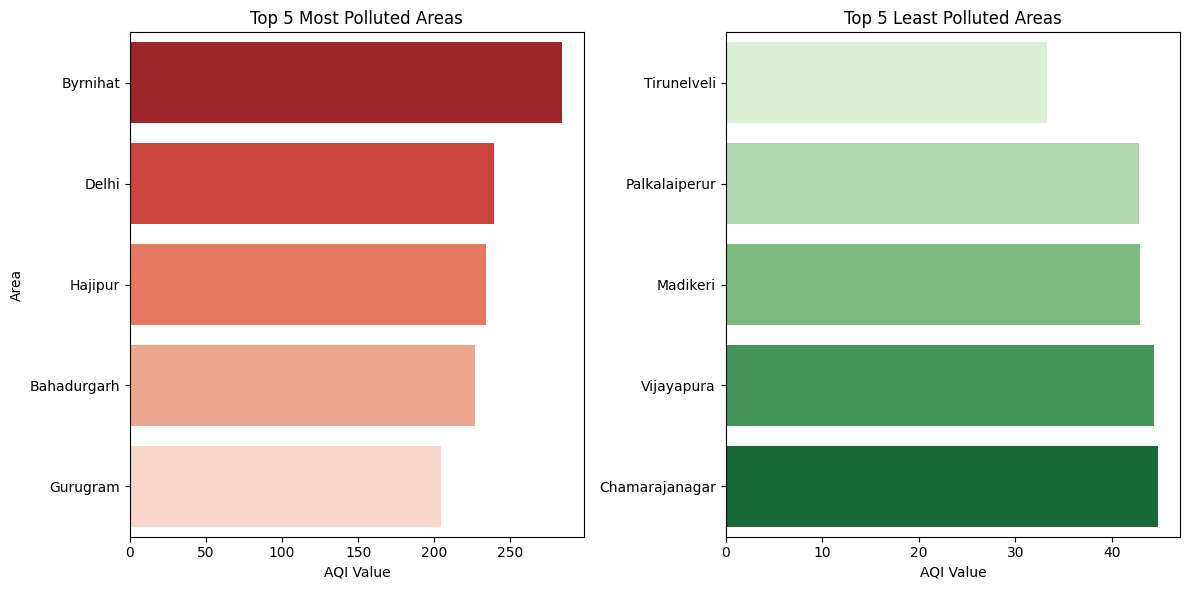

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Top 5
plt.subplot(1, 2, 1)
sns.barplot(data=top_5, x="aqi_value", y="area", palette="Reds_r")
plt.title("Top 5 Most Polluted Areas")
plt.xlabel("AQI Value")
plt.ylabel("Area")

# Bottom 5
plt.subplot(1, 2, 2)
sns.barplot(data=bottom_5, x="aqi_value", y="area", palette="Greens")
plt.title("Top 5 Least Polluted Areas")
plt.xlabel("AQI Value")
plt.ylabel("")

plt.tight_layout()

plt.show()


In [15]:
southern_states = ['Andhra Pradesh', 'Telangana', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Puducherry']

In [16]:
df_filtered = df[
    (df['state'].isin(southern_states)) &
    (df['date'] >= '2022-01-01')
]

In [17]:
df_filtered = df_filtered.dropna(subset=['prominent_pollutants'])

In [18]:
df_exploded = df_filtered.copy()
df_exploded['prominent_pollutants'] = df_exploded['prominent_pollutants'].str.split(', ')
df_exploded = df_exploded.explode('prominent_pollutants')

In [19]:
pollutant_counts = df_exploded.groupby(['state', 'prominent_pollutants']).size().reset_index(name='count')


In [20]:
top_bottom_pollutants = pollutant_counts.groupby('state').apply(
    lambda x: pd.concat([x.nlargest(2, 'count'), x.nsmallest(2, 'count')])
).reset_index(drop=True)

top_bottom_pollutants

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13540\3053846970.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_bottom_pollutants = pollutant_counts.groupby('state').apply(


,state,prominent_pollutants,count
0,Andhra Pradesh,PM10,3182
1,Andhra Pradesh,PM2.5,1757
2,Andhra Pradesh,"PM10,NO2,O3",1
3,Andhra Pradesh,"PM10,NO2,PM2.5,O3",1
4,Karnataka,PM10,13404
5,Karnataka,CO,2913
6,Karnataka,"NO2,O3",1
7,Karnataka,"NO2,SO2,CO",1
8,Kerala,PM10,3167
9,Kerala,PM2.5,1123


In [21]:
top_bottom_pollutants.to_csv("q2_top_bottom_pollutants_southern_states.csv", index=False)


In [22]:
from datetime import datetime, timedelta
one_year_ago = datetime.today() - timedelta(days=365)


In [23]:
last_year_df = df[df['date'] >= one_year_ago]


In [24]:
metro_cities = ['Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bengaluru', 'Hyderabad', 'Ahmedabad', 'Pune']


In [25]:
metro_df = df[df['area'].isin(metro_cities)].copy()


In [26]:
metro_df.loc[:, 'day_of_week'] = metro_df['date'].dt.dayofweek


In [27]:
metro_df['day_type'] = metro_df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


In [28]:
weekend_weekday_aqi = metro_df.groupby(['area', 'day_type'])['aqi_value'].mean().reset_index()


In [29]:
metro_df.loc[:, 'day_of_week'] = metro_df['date'].dt.dayofweek


In [30]:
aqi_comparison = weekend_weekday_aqi.pivot(index='area', columns='day_type', values='aqi_value').reset_index()


In [31]:
aqi_comparison.to_csv('q3_weekday_vs_weekend_aqi.csv', index=False)


In [32]:
print(aqi_comparison)


day_type       area     Weekday     Weekend
0         Ahmedabad  113.685393  113.381250
1         Bengaluru   75.511831   73.322981
2           Chennai   74.434457   72.947205
3             Delhi  206.373599  206.524845
4         Hyderabad   80.895392   81.304348
5           Kolkata  101.322540  103.788820
6            Mumbai  105.728180  106.444099
7              Pune  112.181159  111.444853


In [33]:
aqi_comparison.to_csv('q3_weekday_vs_weekend_aqi.csv', index=False)


In [34]:
print(aqi_comparison)


day_type       area     Weekday     Weekend
0         Ahmedabad  113.685393  113.381250
1         Bengaluru   75.511831   73.322981
2           Chennai   74.434457   72.947205
3             Delhi  206.373599  206.524845
4         Hyderabad   80.895392   81.304348
5           Kolkata  101.322540  103.788820
6            Mumbai  105.728180  106.444099
7              Pune  112.181159  111.444853


In [35]:
weekend_weekday_aqi = metro_df.groupby(['area', 'day_type'])['aqi_value'].mean().reset_index()



In [36]:
top_states = metro_df.groupby('state')['area'].nunique().sort_values(ascending=False).head(10).index


In [37]:
top_states_df = metro_df[metro_df['state'].isin(top_states)]


In [38]:
top_states_df['month'] = pd.to_datetime(top_states_df['date']).dt.month


In [39]:
monthly_avg_aqi = top_states_df.groupby(['state', 'month'])['aqi_value'].mean().reset_index()


In [40]:
monthly_avg_aqi.sort_values(['state', 'aqi_value'], ascending=[True, False], inplace=True)


In [41]:
print(monthly_avg_aqi)

          state  month   aqi_value
10        Delhi     11  355.955556
0         Delhi      1  323.945652
11        Delhi     12  320.365591
1         Delhi      2  223.105882
9         Delhi     10  221.000000
..          ...    ...         ...
76  West Bengal      5   65.494624
77  West Bengal      6   56.922222
79  West Bengal      8   54.774194
80  West Bengal      9   50.177778
78  West Bengal      7   40.021505

[84 rows x 3 columns]


In [42]:
worst_months_per_state = monthly_avg_aqi.loc[monthly_avg_aqi.groupby('state')['aqi_value'].idxmax()]


In [43]:
print(worst_months_per_state)

          state  month   aqi_value
10        Delhi     11  355.955556
13      Gujarat      2  141.258824
24    Karnataka      1   94.717391
47  Maharashtra     12  158.113924
48   Tamil Nadu      1  103.445652
70    Telangana     11  101.744444
72  West Bengal      1  208.141304


In [44]:
monthly_avg_aqi.to_csv('q4_worst_air_quality_months.csv', index=False)


In [45]:
import pandas as pd


In [46]:
df = pd.read_csv("../data/aqi.csv", parse_dates=['date'], dayfirst=True)


In [47]:
bengaluru_df = df[
    (df['area'].str.lower() == 'bengaluru') & 
    (df['date'] >= '2025-03-01') & 
    (df['date'] <= '2025-05-31')]

In [48]:
if 'category' in bengaluru_df.columns:
    category_counts = bengaluru_df['category'].value_counts().reset_index()
    category_counts.columns = ['AQI_Category', 'Days']
else:
    def get_category(aqi):
        if aqi <= 50:
            return 'Good'
        elif aqi <= 100:
            return 'Satisfactory'
        elif aqi <= 200:
            return 'Moderate'
        elif aqi <= 300:
            return 'Poor'
        elif aqi <= 400:
            return 'Very Poor'
        else:
            return 'Severe'
    bengaluru_df.loc[:, 'AQI_Category'] = bengaluru_df['aqi_value'].apply(get_category)

    category_counts = bengaluru_df['AQI_Category'].value_counts().reset_index()
    category_counts.columns = ['AQI_Category', 'Days']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13540\2945922334.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bengaluru_df.loc[:, 'AQI_Category'] = bengaluru_df['aqi_value'].apply(get_category)


In [49]:
print(category_counts)


   AQI_Category  Days
0  Satisfactory    48
1      Moderate    13


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13540\4258412177.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts, x='AQI_Category', y='Days', palette='coolwarm')


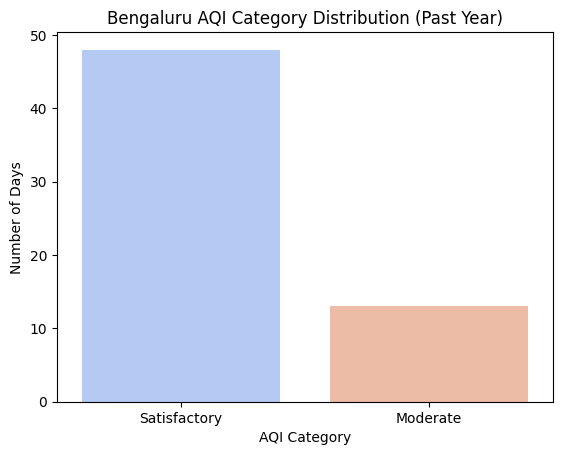

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=category_counts, x='AQI_Category', y='Days', palette='coolwarm')
plt.title("Bengaluru AQI Category Distribution (Past Year)")
plt.xlabel("AQI Category")
plt.ylabel("Number of Days")
plt.show()


In [51]:
print(bengaluru_df[['date', 'aqi_value', 'AQI_Category']].head(20))



           date  aqi_value  AQI_Category
99   2025-04-30         84  Satisfactory
245  2025-04-29         79  Satisfactory
522  2025-04-28         76  Satisfactory
713  2025-04-27         85  Satisfactory
881  2025-04-26         87  Satisfactory
1103 2025-04-25         85  Satisfactory
1415 2025-04-24         88  Satisfactory
1731 2025-04-23         86  Satisfactory
1912 2025-04-22        114      Moderate
2089 2025-04-21         71  Satisfactory
2340 2025-04-20         72  Satisfactory
2532 2025-04-19         79  Satisfactory
2802 2025-04-18         77  Satisfactory
2927 2025-04-17         76  Satisfactory
3256 2025-04-16         87  Satisfactory
3369 2025-04-15         99  Satisfactory
3604 2025-04-14        109      Moderate
3984 2025-04-13         90  Satisfactory
4071 2025-04-12         80  Satisfactory
4379 2025-04-11         78  Satisfactory


In [54]:
category_counts.to_csv("bengaluru_aqi_summary.csv", index=False)


In [55]:
import pandas as pd 

In [61]:
aqi_df = pd.read_csv('../data/aqi.csv', parse_dates=['date'], dayfirst=True)
health_df = pd.read_csv('../data/health.csv', encoding='latin1')



In [58]:
import os
print(os.getcwd())


c:\Users\ASUS\OneDrive\Desktop\AirPure_Project\notebooks


In [64]:
latest_year = aqi_df['date'].dt.year.max()

In [68]:
past_3_years = [latest_year - i for i in range(3)]

In [69]:
aqi_recent = aqi_df[aqi_df['date'].dt.year.isin(past_3_years)]
health_recent = health_df[health_df['year'].isin(past_3_years)]


In [70]:
top_diseases = (
    health_recent.groupby(['state', 'disease'])['total_cases']
    .sum()
    .reset_index()
)



KeyError: 'disease'